In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [8]:
glob_path = '/Users/marlis/Downloads/netCDF/*MONTHLY*.nc'
ds = xr.open_mfdataset(glob_path, 
                       parallel=True, 
                       data_vars='minimal', 
                       coords='minimal', 
                       compat='override',
                       combine='nested', 
                       concat_dim='time')
ds = ds.sortby('time')

In [4]:
grid_ds = xr.open_dataset('/Users/marlis/Downloads/GRID_GEOMETRY_ECCO_V4r5_native_llc0090.nc')

# NonNaN Counts

In [133]:
lat_bins = np.linspace(-90,90,181)
lon_bins = np.linspace(-180,180,361)

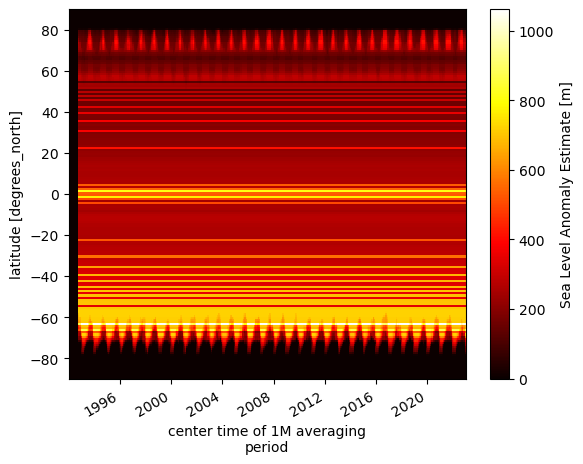

In [11]:
ds.groupby_bins(ds['YC'], lat_bins).count()['SLA_interpolated_to_ECCO_llc90'].plot(cmap='hot')

/Users/marlis/opt/anaconda3/envs/ecco_pipeline/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


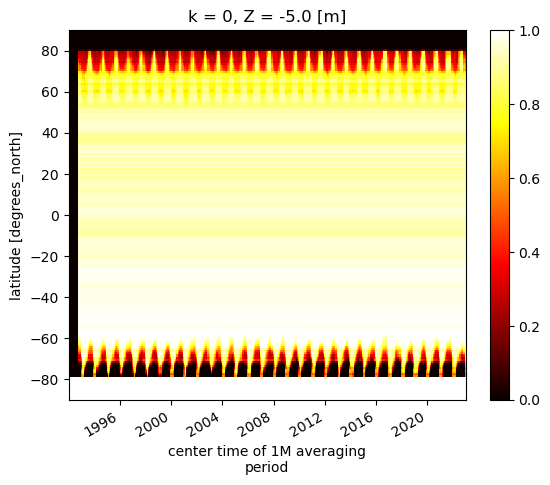

In [12]:
(ds['SLA_interpolated_to_ECCO_llc90'].groupby_bins(ds['YC'], lat_bins).count().T / grid_ds['maskC'][0].groupby_bins(ds['YC'], lat_bins).sum()).plot(cmap='hot')

# Zonal and Meridional Means

Text(0.5, 1.0, 'Zonal Mean')

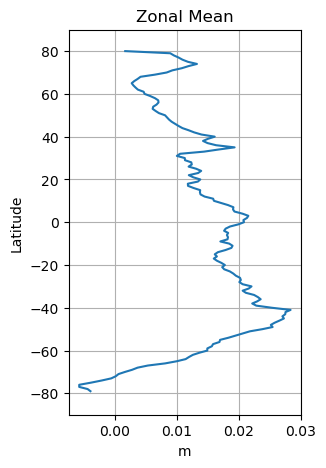

In [143]:
area_avg_da = ds['SLA_interpolated_to_ECCO_llc90'] * grid_ds['rA']

bin_groups = area_avg_da.groupby_bins(area_avg_da['YC'], lat_bins)
area_avg_sum_da = bin_groups.sum().where(~(bin_groups.count() == 0), np.nan)

grid_cell_sum_da = grid_ds['rA'].groupby_bins(grid_ds['YC'], lat_bins).sum()

zonal_avg_da = (area_avg_sum_da / grid_cell_sum_da).mean('time', skipna=True)

fig = plt.figure(figsize=(3,5))
plt.plot(zonal_avg_da.values, [v.left for v in zonal_avg_da['YC_bins'].values])
plt.grid()
plt.ylabel('Latitude')
plt.ylim(-90,90)
plt.xlabel(ds['SLA_interpolated_to_ECCO_llc90'].attrs['units'])
plt.title('Zonal Mean')

Text(0.5, 1.0, 'Meridional Mean')

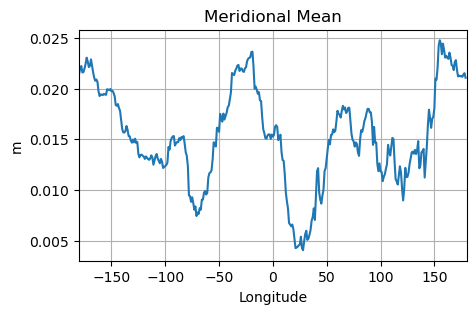

In [145]:
area_avg_da = ds['SLA_interpolated_to_ECCO_llc90'] * grid_ds['rA']

bin_groups = area_avg_da.groupby_bins(area_avg_da['XC'], lon_bins)
area_avg_sum_da = bin_groups.sum().where(~(bin_groups.count() == 0), np.nan)

grid_cell_sum_da = grid_ds['rA'].groupby_bins(grid_ds['XC'], lon_bins).sum()

meridional_avg_da = (area_avg_sum_da / grid_cell_sum_da).mean('time', skipna=True)

fig = plt.figure(figsize=(5,3))
plt.plot([v.left for v in meridional_avg_da['XC_bins'].values], meridional_avg_da.values)
plt.grid()
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel(ds['SLA_interpolated_to_ECCO_llc90'].attrs['units'])
plt.title('Meridional Mean')